# Aim:
 ## Finding the values required for Naive based classifier.

# Importing packages

In [12]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import math
from sklearn.metrics import accuracy_score
import os
from sklearn.model_selection import GridSearchCV

In [13]:
train = pd.read_csv("Desktop/finalfeaturetrain.csv")

In [14]:
train=train.dropna(axis=0)

In [35]:
train

,Unnamed: 0,id,is_duplicate,qid1fre,qid2fre,q1len,q2len,q1words,q2words,wordcommon,...,374_y,375_y,376_y,377_y,378_y,379_y,380_y,381_y,382_y,383_y
1,1,1,0,1,1,51,88,8,13,4,...,35.329720,36.151498,26.113995,-5.945439,-3.764533,-13.242300,-3.119115,-15.074568,1.750255,4.808958
3,3,3,0,1,1,50,65,11,9,0,...,16.037163,-3.360492,-0.675215,-8.187954,-0.426819,0.162989,-7.327550,18.178015,1.128700,1.379088
4,4,4,0,1,1,76,39,13,7,2,...,-0.380434,12.268896,6.165341,-13.538672,4.894008,0.155611,-5.257776,9.056422,13.048725,1.745268
5,5,5,1,1,1,86,90,16,16,8,...,24.143449,19.972768,28.181267,-25.501972,23.001883,1.883642,-17.123497,9.926241,13.280871,14.979537
8,8,8,0,1,1,35,37,8,8,6,...,8.336193,2.019299,-4.640802,0.279581,1.061505,10.414004,-2.804014,10.005005,0.892769,3.307342
9,9,9,0,1,1,60,49,9,9,3,...,19.132862,9.687498,-1.455972,-5.503664,19.651340,13.859298,-11.464403,-0.970975,0.896894,-0.545917
10,10,10,0,1,1,57,116,9,19,1,...,17.829798,39.661318,2.162672,-3.759375,17.590923,-2.598863,-32.714687,21.927518,20.397812,14.187281
12,12,12,1,1,1,36,39,7,8,6,...,4.933216,21.940921,6.257791,-5.428436,0.233901,4.791939,-7.761459,7.260280,9.907419,-1.181105
13,13,13,1,1,1,43,38,7,6,5,...,5.436416,6.635594,1.237909,0.129934,7.216300,-1.111819,-4.087631,-1.823663,-0.871670,-0.639762
14,14,14,0,1,1,141,140,29,29,20,...,22.741162,40.804370,6.412092,-10.953310,21.988174,2.113975,-37.976355,14.675033,13.152643,14.334592


In [16]:
from sklearn.model_selection import train_test_split

In [36]:
y=train['is_duplicate']
X=train.drop('is_duplicate',axis=1)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [39]:
X_test

,Unnamed: 0,id,qid1fre,qid2fre,q1len,q2len,q1words,q2words,wordcommon,totalword,...,374_y,375_y,376_y,377_y,378_y,379_y,380_y,381_y,382_y,383_y
246904,246904,246904,7,7,26,31,6,7,6,42,...,5.020737,8.386144,2.270133,-3.431628,-2.373414,-0.546463,-9.055099,6.648646,7.451595,3.525847
312585,312585,312585,1,1,58,17,12,4,4,40,...,3.908262,2.521263,-1.138298,2.685810,-0.345424,2.183262,0.856128,-0.752256,8.842220,7.024629
220382,220382,220382,1,1,48,33,11,7,4,77,...,4.421195,3.659308,-1.778013,-1.660229,7.256760,7.616280,-0.515641,4.576886,6.072321,6.008135
234607,234607,234607,1,1,47,44,10,10,7,100,...,0.372853,11.130541,0.610802,0.956714,4.556722,9.488072,-12.097143,7.331817,4.668519,7.705921
76873,76873,76873,2,2,57,47,10,8,1,72,...,13.965288,23.797606,-6.510263,-4.445931,2.130449,-3.074383,-5.238733,-0.264352,0.730222,-1.089297
133294,133294,133294,1,1,83,81,12,12,11,144,...,3.186586,34.250000,7.371336,-7.750825,15.277266,-0.896363,-20.631681,5.035777,9.566101,13.634638
299933,299933,299933,1,1,54,44,9,8,0,72,...,5.214010,4.225756,2.374378,-8.357678,10.935276,2.434195,-7.106722,-3.656279,1.572932,-2.523658
117527,117527,117527,1,1,131,92,29,20,9,391,...,21.752113,29.988371,-9.539208,5.510301,7.205631,7.582491,-23.328503,8.711728,8.420698,3.619439
313331,313331,313331,2,2,45,40,9,8,6,72,...,3.707773,13.510465,4.825899,-4.002078,-1.322554,-0.184076,-0.455745,1.585790,0.821903,-4.414906
95831,95831,95831,1,1,40,46,8,9,8,72,...,7.851426,15.064543,14.715051,-13.557605,5.288136,5.734497,-1.567762,4.395393,12.036461,3.529371


In [41]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0],(y_test != y_pred).sum()))

Number of mislabeled points out of a total 89402 points : 39149


In [42]:
accuracy=(1-(39149/270915))*100

In [43]:
accuracy

85.54934204455272

# Naive based classification.

In [44]:

ypredicted=pd.DataFrame(y_pred)
ypredicted.columns=['pred']

In [45]:
ypredicted

,pred
0,1
1,1
2,1
3,1
4,1
5,0
6,1
7,0
8,1
9,1


In [46]:
yy=y_test
yactual=pd.DataFrame(yy)
# yactual=yactual['is_duplicate']
yactual.columns=['actual']


In [47]:
yactual

,actual
246904,0
312585,1
220382,1
234607,0
76873,0
133294,0
299933,0
117527,0
313331,1
95831,1


In [49]:
yact=yactual

In [50]:
yact.index=range(89402)

In [51]:
yact

,actual
0,0
1,1
2,1
3,0
4,0
5,0
6,0
7,0
8,1
9,1


In [52]:
total=pd.concat([yactual,ypredicted],axis=1)

In [53]:
total

,actual,pred
0,0,1
1,1,1
2,1,1
3,0,1
4,0,1
5,0,0
6,0,1
7,0,0
8,1,1
9,1,1


In [54]:
from sklearn.metrics import log_loss as lg

In [55]:
logloss=lg(total["actual"],total["pred"])

In [56]:
logloss

15.124777222025273

In [63]:
a=np.array(total['actual'])
p=np.array(total['pred'])

In [66]:
p

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [79]:
nn=0
for i in range(0,len(a)):
    if a[i]==0 and p[i]==0:
        nn+=1

In [80]:
nn

22852

In [75]:
ny=0
for i in range(0,len(a)):
    if a[i]==0 and p[i]==1:
        ny+=1

In [81]:
ny

33487

In [82]:
yn=0
for i in range(0,len(a)):
    if a[i]==1 and p[i]==0:
        yn+=1

In [83]:
yn

5662

In [86]:
yy=0
for i in range(0,len(a)):
    if a[i]==1 and p[i]==1:
        yy+=1

In [87]:
yy

27401

In [91]:
confusion=([nn,ny],[yn,yy])

In [92]:
confusion

([22852, 33487], [5662, 27401])

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
hm={"pred_0":[22852,5662],
    "pred_1":[33487,27401]}
heat=pd.DataFrame(hm,columns=['pred_0','pred_1'])
heat.rename(index={0:"actual_0",1:'actual_1'},inplace=True)

In [101]:
heat

,pred_0,pred_1
actual_0,22852,33487
actual_1,5662,27401


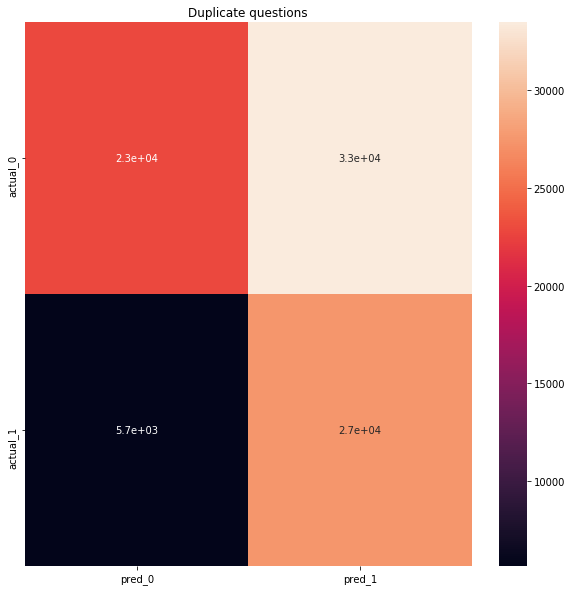

In [108]:
plt.figure(figsize=(10,10))
sns.heatmap(heat,annot=True)
plt.title('Duplicate questions')
plt.show()

In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [116]:
skf = StratifiedKFold(n_splits=3)
params = {}
gs = GridSearchCV(gnb, cv=skf, param_grid=params, return_train_score=True)

In [117]:
gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=GaussianNB(priors=None, var_smoothing=1e-09),
       fit_params=None, iid='warn', n_jobs=None, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [118]:
gs.cv_results_

{'mean_fit_time': array([9.15291452]),
 'std_fit_time': array([3.46696426]),
 'mean_score_time': array([2.11783632]),
 'std_score_time': array([0.04894604]),
 'params': [{}],
 'split0_test_score': array([0.56109412]),
 'split1_test_score': array([0.56315285]),
 'split2_test_score': array([0.55983075]),
 'mean_test_score': array([0.56135924]),
 'std_test_score': array([0.00136913]),
 'rank_test_score': array([1]),
 'split0_train_score': array([0.56159097]),
 'split1_train_score': array([0.56044592]),
 'split2_train_score': array([0.56191688]),
 'mean_train_score': array([0.56131792]),
 'std_train_score': array([0.00063079])}